**Author**: Simon Richard

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# try with a single patient
ts = pd.read_parquet('../../data/series_train.parquet/id=0a418b57')
ts.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,-0.075242,-0.256743,-0.973791,0.038081,-72.952141,0.0,5.0,4202.000000,51250000000000,2,4,-9.0
1,1,-0.265893,-0.270508,-0.765470,0.077430,-52.849220,0.0,0.5,4185.333496,51255000000000,2,4,-9.0
2,2,0.334517,-0.548602,-0.588596,0.039162,-44.118084,0.0,11.5,4185.500000,51260000000000,2,4,-9.0
3,3,0.000193,-0.021069,-0.999681,0.001450,-88.759613,0.0,0.0,4185.666504,51265000000000,2,4,-9.0
4,4,-0.000685,-0.020681,-0.997677,0.000491,-88.756958,0.0,8.5,4185.833496,51270000000000,2,4,-9.0


<Axes: >

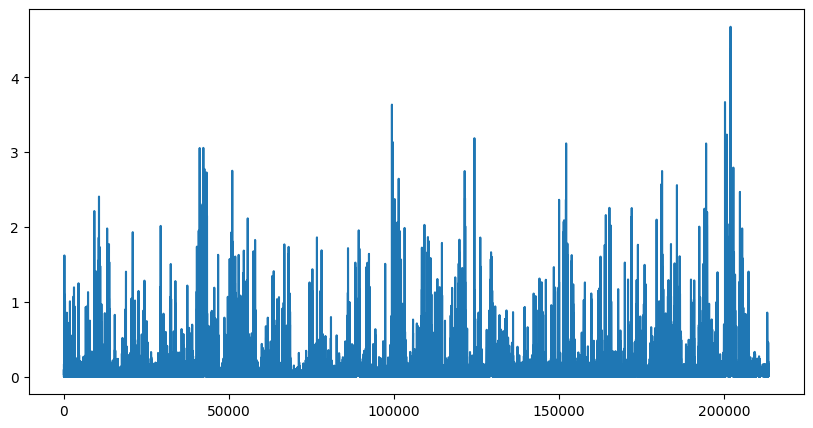

In [23]:
ts['enmo'].plot(kind='line', figsize=(10, 5))

<Axes: xlabel='relative_date_PCIAT'>

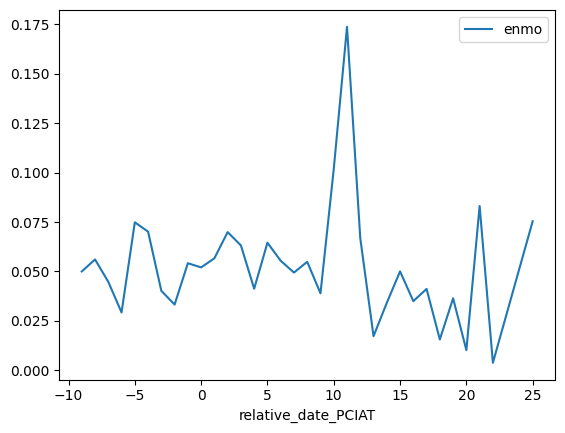

In [24]:
ts.groupby('relative_date_PCIAT').mean().plot(y='enmo', kind='line')

<Axes: xlabel='relative_date_PCIAT'>

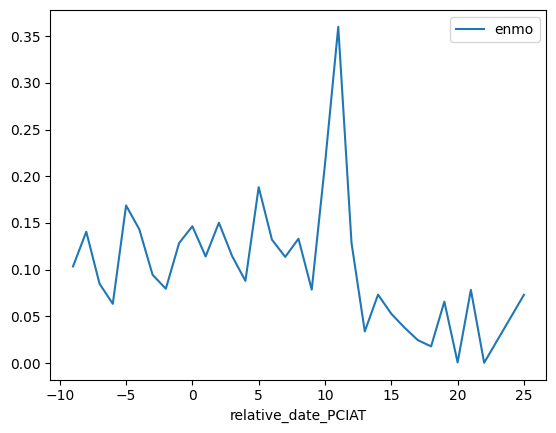

In [25]:
ts.groupby('relative_date_PCIAT').std().plot(y='enmo', kind='line')

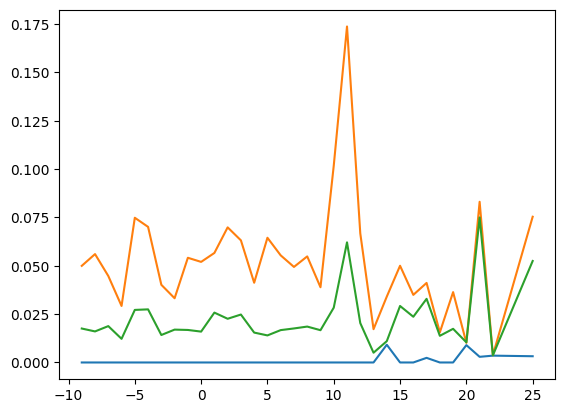

In [26]:
mins = ts.groupby('relative_date_PCIAT')['enmo'].min()
means = ts.groupby('relative_date_PCIAT')['enmo'].mean()
medians = ts.groupby('relative_date_PCIAT')['enmo'].median()
maxes = ts.groupby('relative_date_PCIAT')['enmo'].max()

plt.plot(mins.index, mins, label='min')
plt.plot(means.index, means, label='mean')
plt.plot(medians.index, medians, label='median')
# plt.plot(maxes.index, maxes, label='max')
plt.show()

/tmp/ipykernel_857105/2968373657.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = ts.pivot_table(


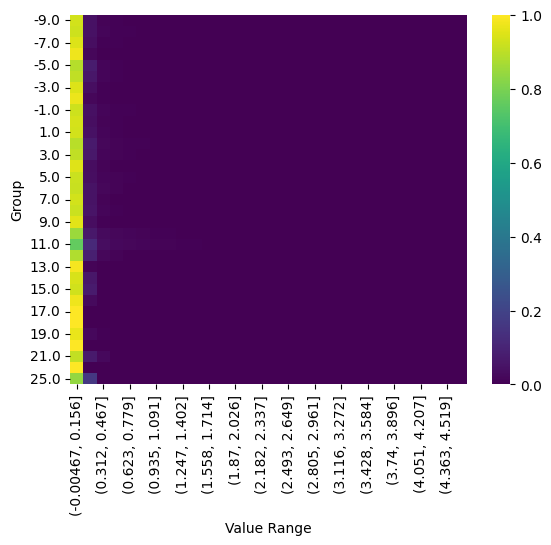

In [27]:
import seaborn as sns

# Assuming you want to plot distribution of 'value_col' for each group in 'group_col'
pivot_data = ts.pivot_table(
    index='relative_date_PCIAT',
    columns=pd.cut(ts['enmo'], bins=30),  # Adjust bins as needed
    aggfunc='size',
    fill_value=0
)

# Normalize rows to show density
pivot_data = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Plot heatmap
sns.heatmap(pivot_data, cmap='viridis')
plt.xlabel('Value Range')
plt.ylabel('Group')
plt.show()

In [28]:
ts['minute_of_day'] = ts['time_of_day'] // (1e9 * 60)

<Axes: xlabel='relative_date_PCIAT,minute_of_day'>

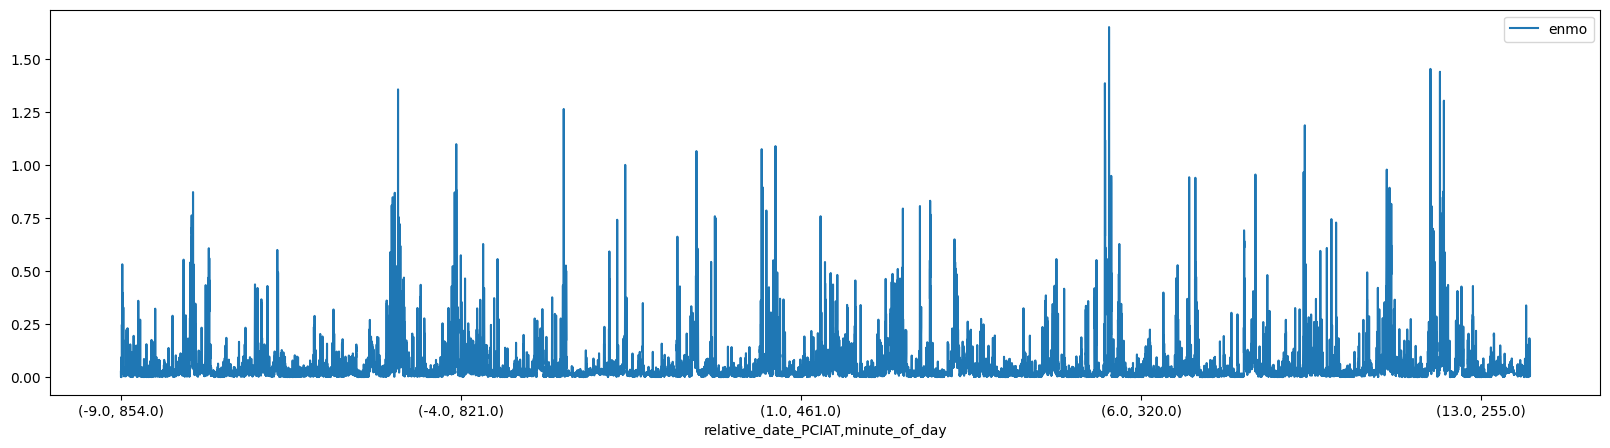

In [29]:
ts.groupby(['relative_date_PCIAT', 'minute_of_day']).mean().plot(y='enmo', kind='line', figsize=(20, 5))

In [30]:
ts['hour_of_day'] = ts['time_of_day'] // (1e9 * 60 * 60)

<Axes: xlabel='relative_date_PCIAT,hour_of_day'>

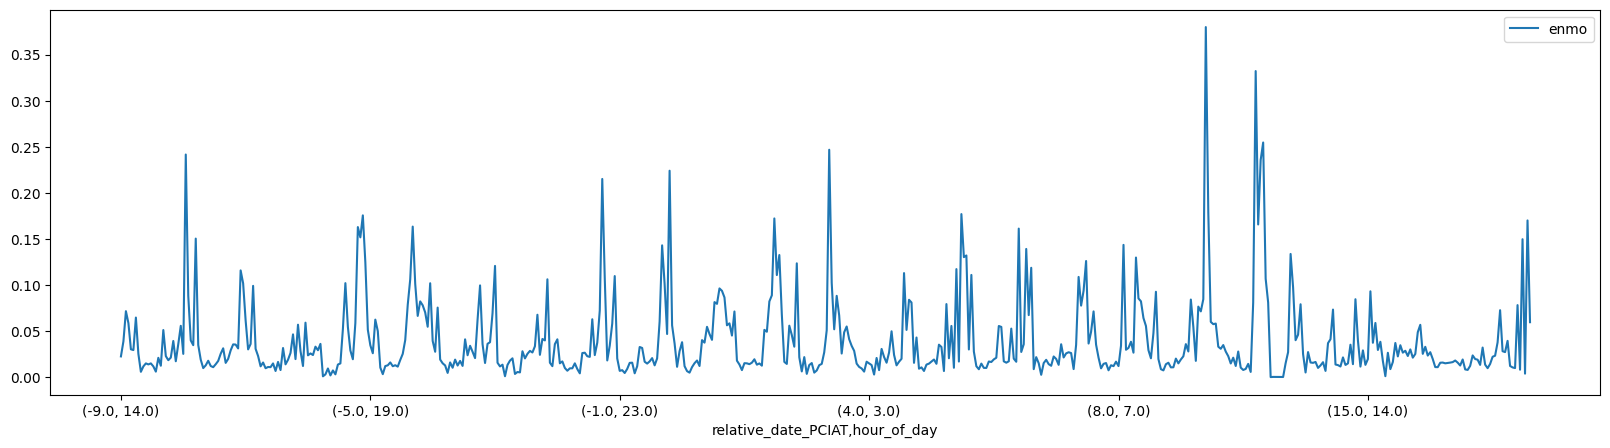

In [31]:
ts.groupby(['relative_date_PCIAT', 'hour_of_day']).mean().plot(y='enmo', kind='line', figsize=(20, 5)) 

In [32]:
ts['5_min_chunk'] = ts['time_of_day'] // (1e9 * 60 * 5)

<Axes: xlabel='relative_date_PCIAT,5_min_chunk'>

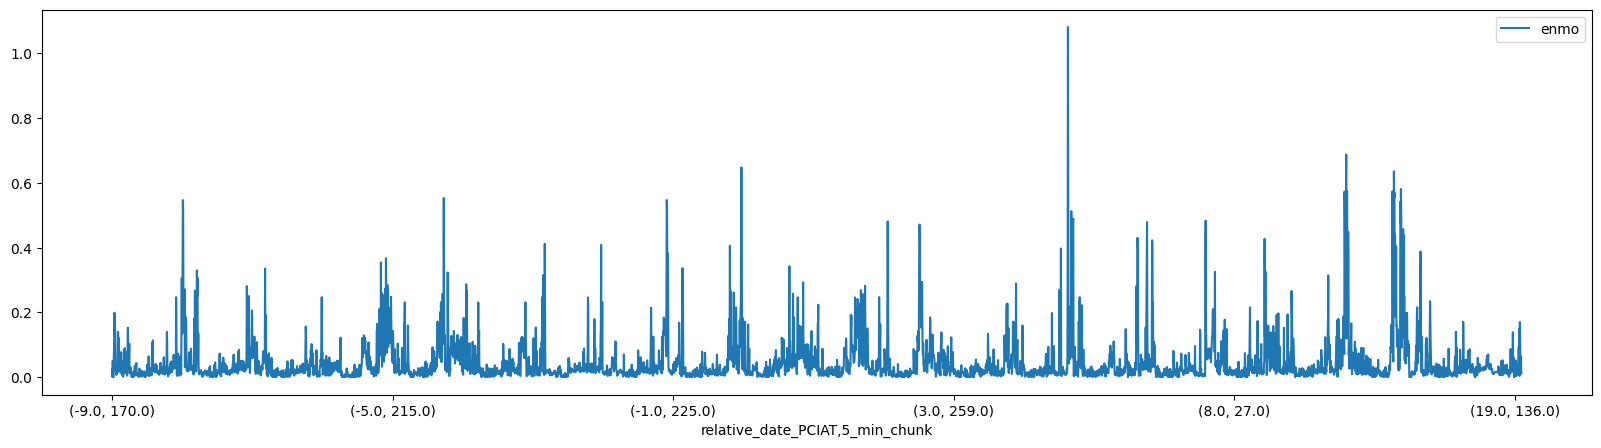

In [33]:
ts.groupby(['relative_date_PCIAT', '5_min_chunk']).mean().plot(y='enmo', kind='line', figsize=(20, 5)) 

In [34]:
ts['15_min_chunk'] = ts['time_of_day'] // (1e9 * 60 * 15)

<Axes: xlabel='relative_date_PCIAT,15_min_chunk'>

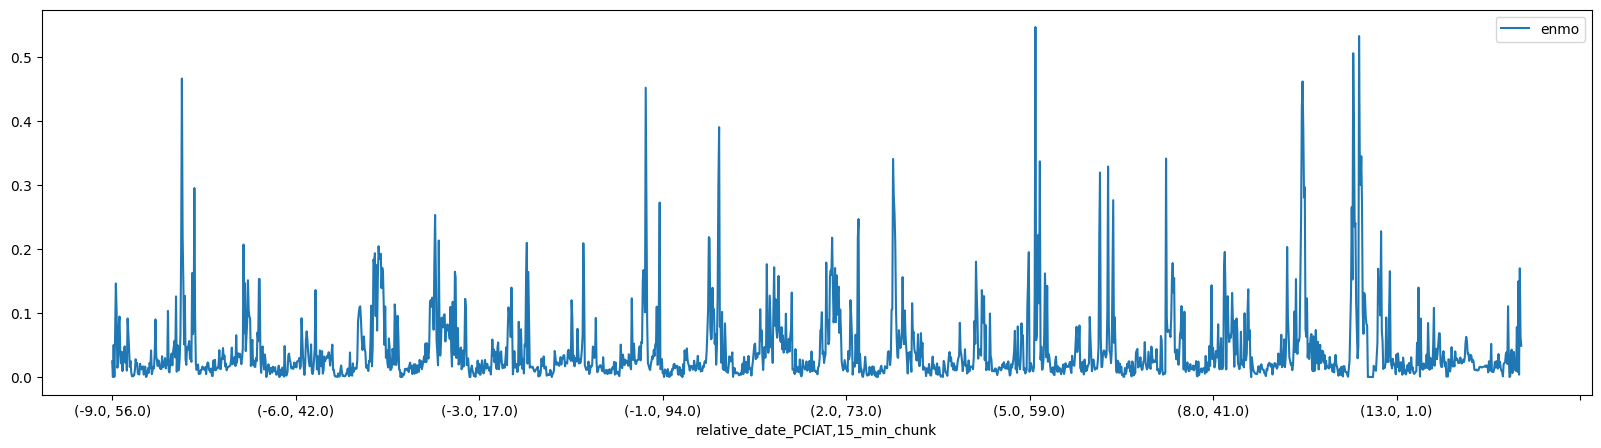

In [35]:
ts.groupby(['relative_date_PCIAT', '15_min_chunk']).mean().plot(y='enmo', kind='line', figsize=(20, 5)) 

<Axes: xlabel='5_min_chunk'>

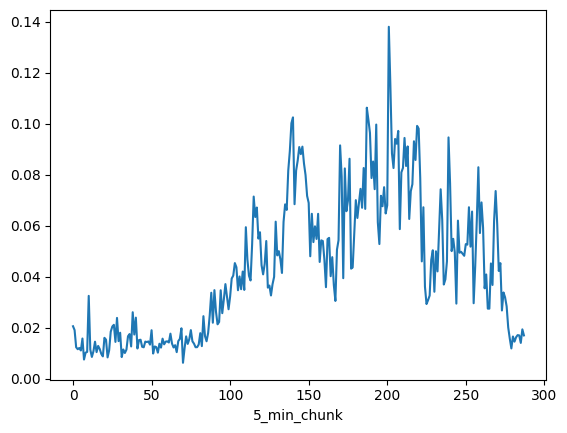

In [36]:
ts.groupby('5_min_chunk')['enmo'].mean().plot(kind='line')

<Axes: xlabel='15_min_chunk'>

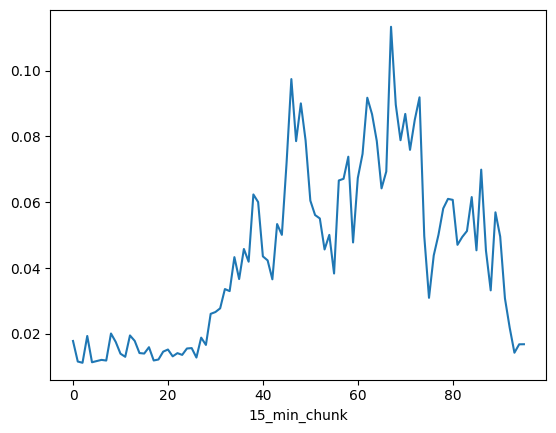

In [37]:
ts.groupby('15_min_chunk')['enmo'].mean().plot(kind='line')

<Axes: xlabel='15_min_chunk'>

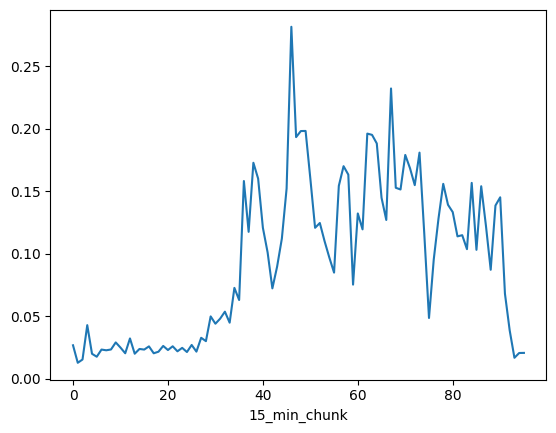

In [38]:
ts.groupby('15_min_chunk')['enmo'].std().plot(kind='line')

<Axes: xlabel='weekday,hour_of_day'>

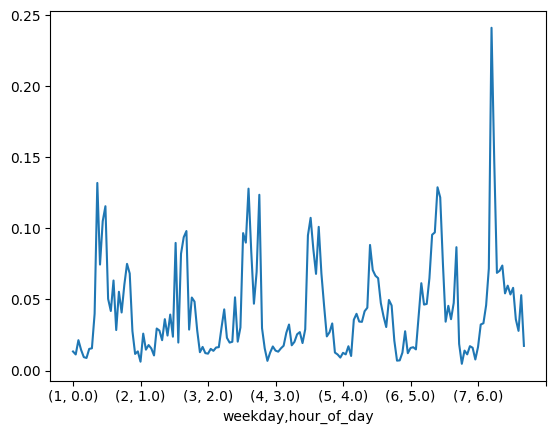

In [43]:
ts.groupby(['weekday', 'hour_of_day'])['enmo'].mean().plot(kind='line')

<Axes: xlabel='quarter,hour_of_day'>

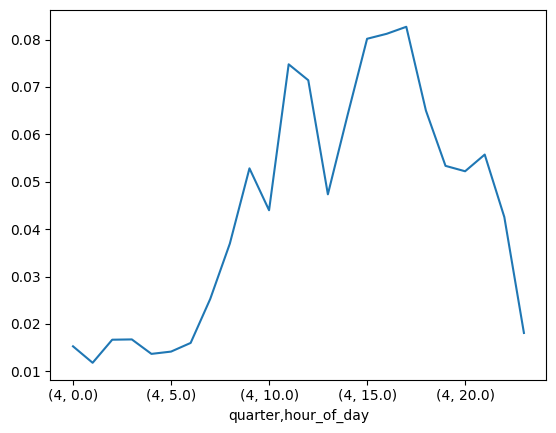

In [44]:
ts.groupby(['quarter', 'hour_of_day'])['enmo'].mean().plot(kind='line')